# Data Science - Laboratorio 2
## Series de Tiempo - Importación, consumo y precios de gasolina
**Integrantes:**
- Diego Leiva
- Pablo Orellana

## Librerias

In [1]:
# Manejo de archivos
import os 

# Manipulación de datos
import pandas as pd
import numpy as np
from datetime import datetime


# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import acf, pacf

# Estadística y series temporales
import statsmodels.tsa as tsa
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# advertencias
# import warnings
# warnings.filterwarnings('ignore')

## Análisis exploratorio

### Comprensión Inicial

#### Cargar los datasets

In [2]:
# Ruta de la carpeta con los archivos
folder_path = 'data'

# Obtener los nombres de los archivos
file_names = [file for file in os.listdir(folder_path) if file.endswith('.csv') and not file.startswith('~')]

# Diccionario para almacenar los dataframes
data_frames = {}

# Iterar sobre los nombres de los archivos
for file in file_names:
    # Construir la ruta del archivo
    file_path = os.path.join(folder_path, file)
    file_name = file.split('.')[0]
    
    # Leer el archivo csv y almacenarlo en un dataframe
    df = pd.read_csv(file_path, sep=';', encoding='utf-8')
    
    # Guardar el dataframe en el diccionario con el nombre del archivo como clave
    data_frames[file_name] = df

# Mostrar los nombres de los archivos
print(f"Se cargaron un total de {len(data_frames)} archivos\n")
print('Archivos cargados:')
for key in data_frames.keys():
    print(f"\t- {key}")

Se cargaron un total de 3 archivos

Archivos cargados:
	- consumos_combustibles
	- importaciones_combustibles
	- precios_combustibles


#### Visualizar información general de cada dataset

In [3]:
def get_DF_info(df):
    """
    Función que genera un dataframe con información sobre las columnas de un dataframe dado.

    Args:
        df (pandas.DataFrame): El dataframe de entrada.
        
    Returns:
        None
    """
    # Crear un dataframe con la información de las columnas    
    info = pd.DataFrame({
        'Nombre Columna': df.columns,
        'Tipo de Dato': df.dtypes,
        'Valores Nulos (%)': (df.isnull().sum() * 100 / df.shape[0]).round(2),
        'Valores Únicos': df.nunique(),
        'Valores Duplicados': df.duplicated().sum()
    }).reset_index(drop=True)

    # Mostrar la informacion
    print(f"El dataframe tiene {df.shape[0]} filas (registros) y {df.shape[1]} columnas (variables)\n")
    display(info)

In [4]:
# Mostrar información de cada dataset
for dataset in data_frames.keys():
    print(f"Informacion del dataset: {dataset}")
    get_DF_info(data_frames[dataset])
    print("\n",(100*'-'),"\n")

Informacion del dataset: consumos_combustibles
El dataframe tiene 293 filas (registros) y 23 columnas (variables)



,Nombre Columna,Tipo de Dato,Valores Nulos (%),Valores Únicos,Valores Duplicados
0,Fecha,object,0.00,293,0
1,Aceites lubricantes,float64,0.00,66,0
2,Asfalto,float64,0.00,293,0
3,Bunker,float64,0.00,293,0
4,Ceras,float64,0.34,31,0
5,Combustible turbo jet,float64,0.00,234,0
6,Diesel bajo azufre,float64,0.00,78,0
7,Diesel ultra bajo azufre,float64,0.00,78,0
8,Gas licuado de petróleo,float64,0.00,293,0
9,Gasolina de aviación,float64,0.00,254,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: importaciones_combustibles
El dataframe tiene 281 filas (registros) y 25 columnas (variables)



,Nombre Columna,Tipo de Dato,Valores Nulos (%),Valores Únicos,Valores Duplicados
0,Fecha,object,0.00,281,0
1,Aceites lubricantes,float64,0.00,66,0
2,Asfalto,float64,0.00,270,0
3,Bunker,float64,0.00,281,0
4,Ceras,float64,0.36,61,0
5,Combustible turbo jet,float64,0.00,99,0
6,Diesel bajo azufre,float64,0.00,78,0
7,Diesel ultra bajo azufre,float64,0.00,47,0
8,Gas licuado de petróleo,float64,0.00,281,0
9,Gasolina de aviación,float64,0.00,165,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: precios_combustibles
El dataframe tiene 1312 filas (registros) y 8 columnas (variables)



,Nombre Columna,Tipo de Dato,Valores Nulos (%),Valores Únicos,Valores Duplicados
0,FECHA,object,0.00,1312,0
1,Tipo de Cambio GTQ/USD,float64,0.38,861,0
2,Superior GTQ/GALON,float64,0.00,167,0
3,Regular GTQ/GALON,float64,0.00,168,0
4,Diesel GTQ/GALON,float64,0.00,174,0
5,Bunker GTQ/GALON,float64,0.00,130,0
6,Glp Cilindro 25Lbs. GTQ/CIL 25 LB,float64,0.00,16,0
7,Glp Cilindro 25Lbs GTQ/LB,float64,0.00,16,0



 ---------------------------------------------------------------------------------------------------- 



#### Visualizar Estructura de cada Dataset

In [5]:
for dataset in data_frames.keys():
    print(f"Primeras 5 filas del dataset: {dataset}")
    display(data_frames[dataset].head())
    print("\n",(100*'-'),"\n")

Primeras 5 filas del dataset: consumos_combustibles


,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Kerosina,Mezclas\noleosas,Naftas,PetCoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,Orimulsión,Total
0,ene/2000,0.0,48446.0,296766.99,0.0,0.0,0.0,0.0,194410.48,1426.0,...,64026.09,0.0,0.0,0.0,0.0,0.0,0.0,634667.06,0.0,1750544.64
1,feb/2000,0.0,50597.0,328116.44,0.0,0.0,0.0,0.0,174710.55,1458.0,...,62660.30,0.0,0.0,0.0,0.0,0.0,0.0,642380.66,0.0,1773220.22
2,mar/2000,0.0,27593.0,368589.63,0.0,0.0,0.0,0.0,189234.07,1503.0,...,61361.99,0.0,0.0,0.0,0.0,0.0,0.0,699807.25,0.0,1909498.79
3,abr/2000,0.0,53794.0,396300.47,0.0,0.0,0.0,0.0,174330.61,1561.0,...,61814.32,0.0,0.0,0.0,0.0,0.0,0.0,586803.98,0.0,1800932.86
4,may/2000,0.0,60137.0,449368.92,0.0,0.0,0.0,0.0,191745.15,1642.0,...,54098.32,0.0,0.0,0.0,0.0,0.0,0.0,656948.20,0.0,1941771.90



 ---------------------------------------------------------------------------------------------------- 

Primeras 5 filas del dataset: importaciones_combustibles


,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Naftas,Petcoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,MTBE,Orimulsión,Petróleo reconstituido,Total importación
0,ene/2001,0.0,27748.99,214581.84,0.0,0.0,0.0,0.0,194065.74,820.0,...,0.0,0.0,0.0,0.0,0.0,566101.99,8402.0,0.0,715344.0,2312639.05
1,feb/2001,0.0,7503.57,294609.00,0.0,0.0,0.0,0.0,170703.38,3054.0,...,0.0,0.0,0.0,0.0,0.0,489525.80,0.0,0.0,370166.0,1769208.76
2,mar/2001,0.0,26304.32,315263.80,0.0,0.0,0.0,0.0,161837.37,677.0,...,0.0,0.0,0.0,0.0,0.0,575559.68,0.0,0.0,360530.0,1945770.26
3,abr/2001,0.0,7885.89,205653.00,0.0,0.0,0.0,0.0,163048.64,3399.0,...,0.0,0.0,0.0,0.0,0.0,437745.42,8184.0,0.0,359527.0,1623637.76
4,may/2001,0.0,8443.16,278371.30,0.0,0.0,0.0,0.0,171518.86,585.0,...,0.0,0.0,0.0,0.0,0.0,552609.13,12680.0,0.0,723346.0,2262726.64



 ---------------------------------------------------------------------------------------------------- 

Primeras 5 filas del dataset: precios_combustibles


,FECHA,Tipo de Cambio GTQ/USD,Superior GTQ/GALON,Regular GTQ/GALON,Diesel GTQ/GALON,Bunker GTQ/GALON,Glp Cilindro 25Lbs. GTQ/CIL 25 LB,Glp Cilindro 25Lbs GTQ/LB
0,01/ene/2021,7.79382,21.91,21.11,17.61,13.40,99.0,3.96
1,02/ene/2021,7.79382,21.91,21.11,17.61,13.40,99.0,3.96
2,03/ene/2021,7.79382,21.91,21.11,17.61,13.40,99.0,3.96
3,04/ene/2021,7.79417,21.91,21.11,17.61,13.45,99.0,3.96
4,05/ene/2021,7.79369,21.91,21.11,17.61,13.45,99.0,3.96



 ---------------------------------------------------------------------------------------------------- 



### Identificación de Variables

**Consumo de Combustibles**
- `Fecha`: mes y año en el que se tomó el registro del consumo de combustibles.
- `Aceites lubricantes`: consumo en unidades de barriles de 42 galones de aceites lubricantes.
- `Asfalto`: consumo en unidades de barriles de 42 galones de asfalto.
- `Bunker`: consumo en unidades de barriles de 42 galones de bunker.
- `Ceras`: consumo en unidades de barriles de 42 galones de ceras.
- `Combustible turbo jet`: consumo en unidades de barriles de 42 galones de combustible turbo jet.
- `Diesel bajo azufre`: consumo en unidades de barriles de 42 galones de diesel bajo azufre.
- `Diesel ultra bajo azufre`: consumo en unidades de barriles de 42 galones de diesel ultra bajo azufre.
- `Gas licuado de petróleo`: consumo en unidades de barriles de 42 galones de gas licuado de petróleo.
- `Gasolina de aviación`: consumo en unidades de barriles de 42 galones de gasolina de aviación.
- `Gasolina regular`: consumo en unidades de barriles de 42 galones de gasolina regular.
- `Gasolina superior`: consumo en unidades de barriles de 42 galones de gasolina superior.
- `Grasas lubricantes`: consumo en unidades de barriles de 42 galones de grasas lubricantes.
- `Kerosina`: consumo en unidades de barriles de 42 galones de kerosina.
- `Mezclas\noleosas`: consumo en unidades de barriles de 42 galones de mezclas oleosas.
- `Naftas`: consumo en unidades de barriles de 42 galones de naftas.
- `PetCoke`: consumo en unidades de barriles de 42 galones de PetCoke.
- `Petróleo crudo`: consumo en unidades de barriles de 42 galones de petróleo crudo.
- `Solventes`: consumo en unidades de barriles de 42 galones de solventes.
- `Butano`: consumo en unidades de barriles de 42 galones de butano.
- `Diesel alto azufre`: consumo en unidades de barriles de 42 galones de diesel alto azufre.
- `Orimulsión`: consumo en unidades de barriles de 42 galones de orimulsión.
- `Total`: consumo total en unidades de barriles de 42 galones de todos los combustibles mencionados.

**Importación de Combustibles**
- `Fecha`: mes y año en el que se tomó el registro de la importación de combustibles.
- `Aceites lubricantes`: importación en unidades de barriles de 42 galones de aceites lubricantes.
- `Asfalto`: importación en unidades de barriles de 42 galones de asfalto.
- `Bunker`: importación en unidades de barriles de 42 galones de bunker.
- `Ceras`: importación en unidades de barriles de 42 galones de ceras.
- `Combustible turbo jet`: importación en unidades de barriles de 42 galones de combustible turbo jet.
- `Diesel bajo azufre`: importación en unidades de barriles de 42 galones de diesel bajo azufre.
- `Diesel ultra bajo azufre`: importación en unidades de barriles de 42 galones de diesel ultra bajo azufre.
- `Gas licuado de petróleo`: importación en unidades de barriles de 42 galones de gas licuado de petróleo.
- `Gasolina de aviación`: importación en unidades de barriles de 42 galones de gasolina de aviación.
- `Gasolina regular`: importación en unidades de barriles de 42 galones de gasolina regular.
- `Gasolina superior`: importación en unidades de barriles de 42 galones de gasolina superior.
- `Grasas lubricantes`: importación en unidades de barriles de 42 galones de grasas lubricantes.
- `Kerosina`: importación en unidades de barriles de 42 galones de kerosina.
- `Mezclas oleosas`: importación en unidades de barriles de 42 galones de mezclas oleosas.
- `Naftas`: importación en unidades de barriles de 42 galones de naftas.
- `PetCoke`: importación en unidades de barriles de 42 galones de PetCoke.
- `Petróleo crudo`: importación en unidades de barriles de 42 galones de petróleo crudo.
- `Solventes`: importación en unidades de barriles de 42 galones de solventes.
- `Butano`: importación en unidades de barriles de 42 galones de butano.
- `Diesel alto azufre`: importación en unidades de barriles de 42 galones de diesel alto azufre.
- `MTBE`: importación en unidades de barriles de 42 galones de Metil terbutil éter (MTBE).
- `Orimulsión`: importación en unidades de barriles de 42 galones de orimulsión.
- `Petróleo reconstituido`: importación en unidades de barriles de 42 galones de petróleo reconstituido.
- `Total importación`: importación total en unidades de barriles de 42 galones de todos los combustibles mencionados.

**Precios de Combustibles**
- `FECHA`: fecha en la que se tomó el registro del precio de combustibles.
- `Tipo de Cambio GTQ/USD`: tipo de cambio del quetzal guatemalteco (GTQ) respecto al dólar estadounidense (USD).
- `Superior GTQ/GALON`: precio en quetzales por galón de gasolina superior.
- `Regular GTQ/GALON`: precio en quetzales por galón de gasolina regular.
- `Diesel GTQ/GALON`: precio en quetzales por galón de diesel.
- `Bunker GTQ/GALON`: precio en quetzales por galón de bunker.
- `Glp Cilindro 25Lbs. GTQ/CIL 25 LB`: precio en quetzales por cilindro de 25 libras de gas licuado de petróleo (GLP).
- `Glp Cilindro 25Lbs GTQ/LB`: precio en quetzales por libra de gas licuado de petróleo (GLP) en cilindros de 25 libras.


In [6]:
def get_categorical_variables(df):
    """
    Función que obtiene las variables categóricas de un dataframe.

    Args:
        df (pandas.DataFrame): El dataframe de entrada.
    
    Returns:
        categorical (list): Lista con los nombres de las variables categóricas.
        binary_categorical (list): Lista con los nombres de las variables categóricas binarias.
    """
    # Obtener las variables categóricas
    categorical = df.select_dtypes(include=['object']).columns.tolist()

    print(f"Hay {len(categorical)} variables categoricas en el dataset:")
    for column in categorical:
        print(f"- {column}")

    # Contar las variables categoricas binarias en el dataset de entreno
    binary_categorical = [col for col in categorical if df[col].nunique() == 2]

    print(f"\nHay {len(binary_categorical)} variables categoricas binarias en el dataset:")
    for column in binary_categorical:
        print(f"- {column}")

    return categorical, binary_categorical


In [7]:
def get_numerical_variables(df):
    """
    Función que obtiene las variables numéricas de un dataframe.

    Args:
        df (pandas.DataFrame): El dataframe de entrada.
    
    Returns:
        numerical (list): Lista con los nombres de las variables numéricas.
        binary (list): Lista con los nombres de las variables numéricas binarias.
        continuous (list): Lista con los nombres de las variables numéricas continuas.
        discrete (list): Lista con los nombres de las variables numéricas discretas.
    """
    # Encontrar variables numericas en el dataset
    numerical = df.select_dtypes(exclude=['object']).columns.tolist()

    # Contar las variables cuantitativas binarias en el dataset
    binary = [col for col in numerical if df[col].nunique() == 2]

    # Contar las variables cuantitativas continuas en el dataset
    continuous = df.select_dtypes(include=['float']).columns

    # Contar las variables cuantitativas discretas en el dataset
    discrete = [col for col in numerical if col not in continuous and col not in binary]

    print(f"Hay {len(numerical)} variables cuantitativas en el dataset\n")
    print(f"Hay {len(binary)} variables cuantitativas binarias en el dataset:")
    for column in binary:
        print(f"- {column}")

    print(f"\nHay {len(discrete)} variables cuantitativas discretas:")
    for column in discrete:
        print(f"- {column}")

    print(f"\nHay {len(continuous)} variables cuantitativas continuas:")
    for column in continuous:
        print(f"- {column}")

    return numerical, binary, continuous, discrete

##### Variables Categóricas

In [8]:
for dataset in data_frames.keys():
    print(f"Dataset: {dataset}\n")
    categorical, _ = get_categorical_variables(data_frames[dataset])
    print("\n",(100*'-'),"\n")

Dataset: consumos_combustibles

Hay 1 variables categoricas en el dataset:
- Fecha

Hay 0 variables categoricas binarias en el dataset:

 ---------------------------------------------------------------------------------------------------- 

Dataset: importaciones_combustibles

Hay 1 variables categoricas en el dataset:
- Fecha

Hay 0 variables categoricas binarias en el dataset:

 ---------------------------------------------------------------------------------------------------- 

Dataset: precios_combustibles

Hay 1 variables categoricas en el dataset:
- FECHA

Hay 0 variables categoricas binarias en el dataset:

 ---------------------------------------------------------------------------------------------------- 



#### Variables Numéricas

In [9]:
for dataset in data_frames.keys():
    print(f"Dataset: {dataset}")
    numerical, binary, continuous, discrete = get_numerical_variables(data_frames[dataset])
    print("\n", '-'*35, "\n")

Dataset: consumos_combustibles
Hay 22 variables cuantitativas en el dataset

Hay 0 variables cuantitativas binarias en el dataset:

Hay 0 variables cuantitativas discretas:

Hay 22 variables cuantitativas continuas:
- Aceites lubricantes
- Asfalto
- Bunker
- Ceras
- Combustible turbo jet
- Diesel bajo azufre
- Diesel ultra bajo azufre
- Gas licuado de petróleo
- Gasolina de aviación
- Gasolina regular
- Gasolina superior
- Grasas lubricantes
- Kerosina
- Mezclas
oleosas
- Naftas
- PetCoke
- Petróleo crudo
- Solventes
- Butano
- Diesel alto azufre
- Orimulsión
- Total

 ----------------------------------- 

Dataset: importaciones_combustibles
Hay 24 variables cuantitativas en el dataset

Hay 0 variables cuantitativas binarias en el dataset:

Hay 0 variables cuantitativas discretas:

Hay 24 variables cuantitativas continuas:
- Aceites lubricantes
- Asfalto 
- Bunker
- Ceras
- Combustible turbo jet
- Diesel bajo azufre
- Diesel ultra bajo azufre
- Gas licuado de petróleo
- Gasolina de avi

### Preprocesamiento y Limpieza

#### Verificación y Manejo de valores nulos o faltantes

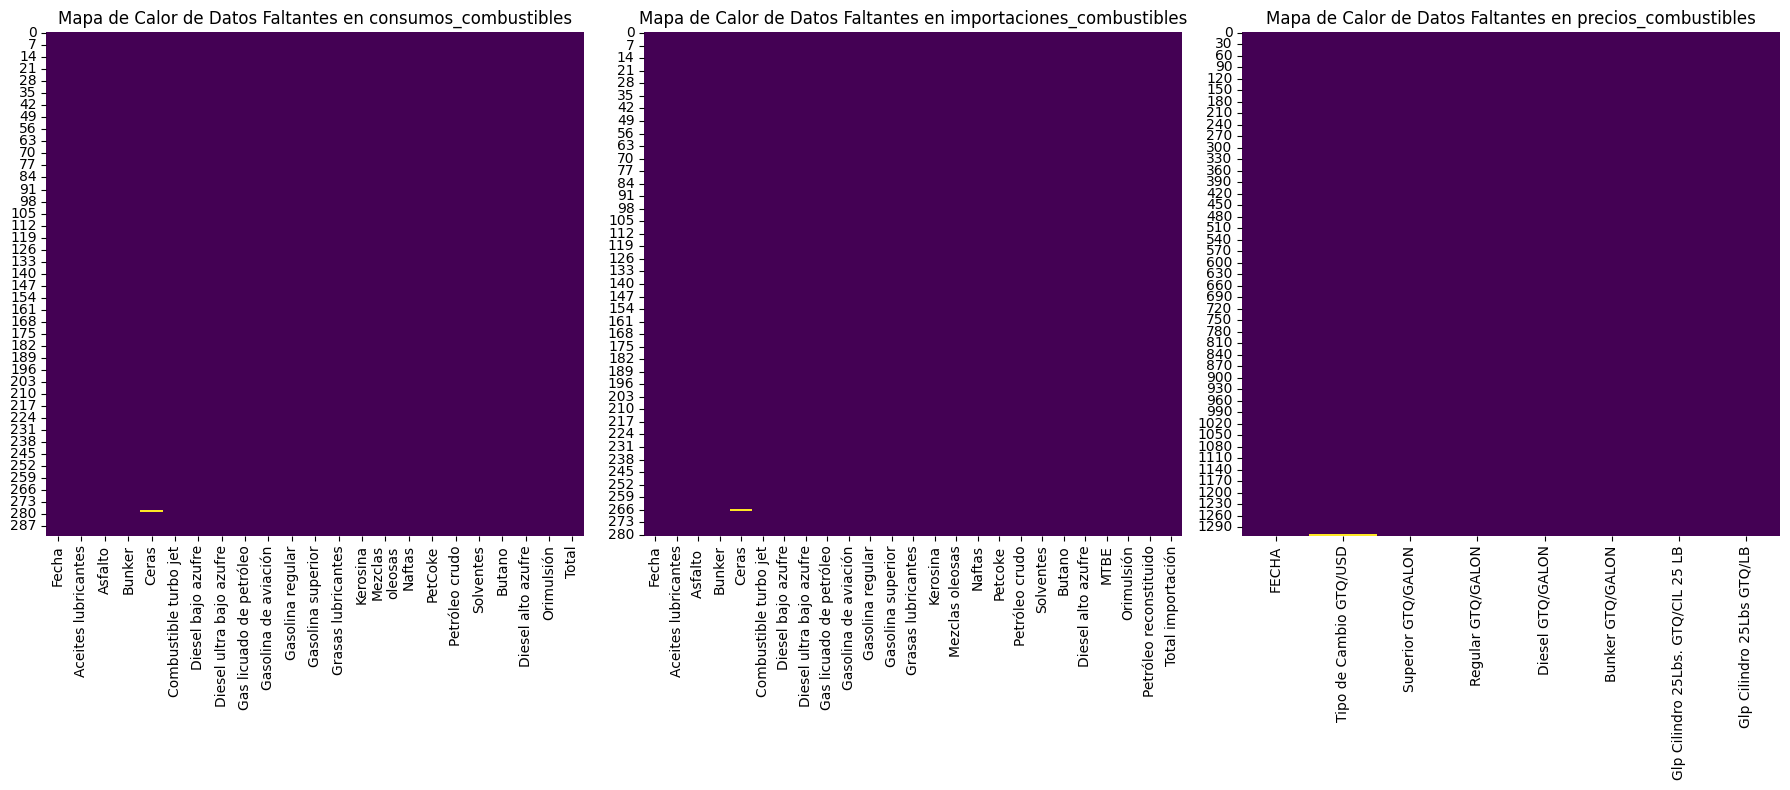

In [10]:
# Crear los subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# Iterar sobre los dataframes en el diccionario
for ax, (key, df) in zip(axes, data_frames.items()):
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', ax=ax)
    ax.set_title(f'Mapa de Calor de Datos Faltantes en {key}')

# Ajustar el layout para que no se solapen los subplots
plt.tight_layout()
plt.show()

Los tres dataframes muestran que los datos faltantes son mínimos y están contenidos en una sola variable, corroborando nuestra exploración inicial que indicaba que ninguno de los dataframes tenía más del 1% de datos faltantes. Esta situación sugiere que la calidad de los datos es bastante buena y que los datos faltantes no deberían tener un impacto significativo en cualquier análisis posterior.
De todas formas se realizara un análisis de impacto para ver si eliminar esos registros es factible o mejor se realiza algun tipo de imputación de datos.

In [11]:
# Diccionario para almacenar los resultados
cleaned_data_info = {}

# Iterar sobre cada dataframe en el diccionario
for key, df in data_frames.items():
    # Crear una copia del dataframe
    df_copy = df.copy()
    
    # Eliminar filas con cualquier valor nulo
    df_clean = df_copy.dropna()
    
    # Verificar cuántos registros quedan después de eliminar los nulos
    remaining_records = df_clean.shape[0]
    remaining_records_percentage = (remaining_records / df.shape[0]) * 100
    
    # Guardar la información en el diccionario
    cleaned_data_info[key] = {
        'remaining_records': remaining_records,
        'remaining_records_percentage': remaining_records_percentage
    }

# Imprimir los resultados
for key, info in cleaned_data_info.items():
    print(f"Si se eliminan todas las observaciones con valores nulos en '{key}'")
    print (f"Quedarian {info['remaining_records']} registros, de los {data_frames[key].shape[0]} registros iniciales")
    print(f"Es decir {info['remaining_records_percentage']:.2f}% de la data original")
    print('-'*100)


Si se eliminan todas las observaciones con valores nulos en 'consumos_combustibles'
Quedarian 292 registros, de los 293 registros iniciales
Es decir 99.66% de la data original
----------------------------------------------------------------------------------------------------
Si se eliminan todas las observaciones con valores nulos en 'importaciones_combustibles'
Quedarian 280 registros, de los 281 registros iniciales
Es decir 99.64% de la data original
----------------------------------------------------------------------------------------------------
Si se eliminan todas las observaciones con valores nulos en 'precios_combustibles'
Quedarian 1307 registros, de los 1312 registros iniciales
Es decir 99.62% de la data original
----------------------------------------------------------------------------------------------------


En los tres dataframes, los datos faltantes representan menos del 0.5% del total de registros. Por lo tanto, la calidad de los datos es bastante buena y la eliminación de las observaciones con valores nulos no afectará significativamente el análisis posterior. Se puede proceder con la limpieza de datos eliminando las filas con valores nulos sin preocuparse por una pérdida significativa de información.

In [12]:
# cargar cada dataset como su propio dataframe
consumos = data_frames['consumos_combustibles']
importaciones = data_frames['importaciones_combustibles']
precios = data_frames['precios_combustibles']

# Eliminar los registros con valores nulos
consumos.dropna(inplace=True)
importaciones.dropna(inplace=True)
precios.dropna(inplace=True)

# Comprobar si hay valores nulos
print("Valores nulos en el dataset de consumo de combustibles:", consumos.isnull().sum().sum())
print("Valores nulos en el dataset de importación de combustibles:", importaciones.isnull().sum().sum())
print("Valores nulos en el dataset de precios de combustibles:", precios.isnull().sum().sum())

Valores nulos en el dataset de consumo de combustibles: 0
Valores nulos en el dataset de importación de combustibles: 0
Valores nulos en el dataset de precios de combustibles: 0


#### Manejo de Variables Cualitativas Temporales

Dado que los 3 datasets contienen una unica variable culitativa la cual es fecha, esta debe de transformarse a tipo datetime para poder ser manipulada como tal, actualmente en los 3 datasets esta variable `FECHA` se encuentra como string. Esta columna posteriormente se colocara como el indice de cada dataset para que se pueda tener una serie temporal.

In [13]:
# Diccionario de meses en español a inglés
month_mapping = {
    'ene': 'Jan',
    'feb': 'Feb',
    'mar': 'Mar',
    'abr': 'Apr',
    'may': 'May',
    'jun': 'Jun',
    'jul': 'Jul',
    'ago': 'Aug',
    'sep': 'Sep',
    'oct': 'Oct',
    'nov': 'Nov',
    'dic': 'Dec'
}

# Función para reemplazar los nombres de los meses
def replace_months(date_str):
    for esp, eng in month_mapping.items():
        date_str = date_str.replace(esp, eng)
    return date_str

# Por fines practicos, se renombra la columna  'FECHA' a 'Fecha' en el dataset de precios de combustibles
precios.rename(columns={'FECHA': 'Fecha'}, inplace=True)

# Aplicar la función a las columnas de fecha de los dataframes
consumos['Fecha'] = consumos['Fecha'].apply(replace_months)
importaciones['Fecha'] = importaciones['Fecha'].apply(replace_months)
precios['Fecha'] = precios['Fecha'].apply(replace_months)

# Convertir las columnas de fecha a datetime
consumos['Fecha'] = pd.to_datetime(consumos['Fecha'], format='%b/%Y')
importaciones['Fecha'] = pd.to_datetime(importaciones['Fecha'], format='%b/%Y')
precios['Fecha'] = pd.to_datetime(precios['Fecha'], format='%d/%b/%Y')

# Establecer la columna 'Fecha' como índice en los tres dataframes
consumos.set_index('Fecha', inplace=True)
importaciones.set_index('Fecha', inplace=True)
precios.set_index('Fecha', inplace=True)

# Converir los indices a datetime
consumos.index = pd.to_datetime(consumos.index)
importaciones.index = pd.to_datetime(importaciones.index)
precios.index = pd.to_datetime(precios.index)

# Verificar los resultados
print("Consumo de combustibles:")
display(data_frames['consumos_combustibles'].head())
print("Importación de combustibles:")
display(data_frames['importaciones_combustibles'].head())
print("Precios de combustibles:")
display(data_frames['precios_combustibles'].head())


Consumo de combustibles:


,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,Gasolina regular,...,Kerosina,Mezclas\noleosas,Naftas,PetCoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,Orimulsión,Total
Fecha,,,,,,,,,,,,,,,,,,,,,
2000-01-01,0.0,48446.0,296766.99,0.0,0.0,0.0,0.0,194410.48,1426.0,202645.20,...,64026.09,0.0,0.0,0.0,0.0,0.0,0.0,634667.06,0.0,1750544.64
2000-02-01,0.0,50597.0,328116.44,0.0,0.0,0.0,0.0,174710.55,1458.0,205530.96,...,62660.30,0.0,0.0,0.0,0.0,0.0,0.0,642380.66,0.0,1773220.22
2000-03-01,0.0,27593.0,368589.63,0.0,0.0,0.0,0.0,189234.07,1503.0,229499.56,...,61361.99,0.0,0.0,0.0,0.0,0.0,0.0,699807.25,0.0,1909498.79
2000-04-01,0.0,53794.0,396300.47,0.0,0.0,0.0,0.0,174330.61,1561.0,210680.40,...,61814.32,0.0,0.0,0.0,0.0,0.0,0.0,586803.98,0.0,1800932.86
2000-05-01,0.0,60137.0,449368.92,0.0,0.0,0.0,0.0,191745.15,1642.0,208164.34,...,54098.32,0.0,0.0,0.0,0.0,0.0,0.0,656948.20,0.0,1941771.90


Importación de combustibles:


,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,Gasolina regular,...,Naftas,Petcoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,MTBE,Orimulsión,Petróleo reconstituido,Total importación
Fecha,,,,,,,,,,,,,,,,,,,,,
2001-01-01,0.0,27748.99,214581.84,0.0,0.0,0.0,0.0,194065.74,820.0,177776.50,...,0.0,0.0,0.0,0.0,0.0,566101.99,8402.0,0.0,715344.0,2312639.05
2001-02-01,0.0,7503.57,294609.00,0.0,0.0,0.0,0.0,170703.38,3054.0,123115.99,...,0.0,0.0,0.0,0.0,0.0,489525.80,0.0,0.0,370166.0,1769208.76
2001-03-01,0.0,26304.32,315263.80,0.0,0.0,0.0,0.0,161837.37,677.0,161726.42,...,0.0,0.0,0.0,0.0,0.0,575559.68,0.0,0.0,360530.0,1945770.26
2001-04-01,0.0,7885.89,205653.00,0.0,0.0,0.0,0.0,163048.64,3399.0,127338.74,...,0.0,0.0,0.0,0.0,0.0,437745.42,8184.0,0.0,359527.0,1623637.76
2001-05-01,0.0,8443.16,278371.30,0.0,0.0,0.0,0.0,171518.86,585.0,168730.19,...,0.0,0.0,0.0,0.0,0.0,552609.13,12680.0,0.0,723346.0,2262726.64


Precios de combustibles:


,Tipo de Cambio GTQ/USD,Superior GTQ/GALON,Regular GTQ/GALON,Diesel GTQ/GALON,Bunker GTQ/GALON,Glp Cilindro 25Lbs. GTQ/CIL 25 LB,Glp Cilindro 25Lbs GTQ/LB
Fecha,,,,,,,
2021-01-01,7.79382,21.91,21.11,17.61,13.40,99.0,3.96
2021-01-02,7.79382,21.91,21.11,17.61,13.40,99.0,3.96
2021-01-03,7.79382,21.91,21.11,17.61,13.40,99.0,3.96
2021-01-04,7.79417,21.91,21.11,17.61,13.45,99.0,3.96
2021-01-05,7.79369,21.91,21.11,17.61,13.45,99.0,3.96


#### Selección de Variables

En este estudio y análisis de series de tiempo, solo se tomarán en cuenta los datos de importación, consumo y precios de los siguientes tipos de combustibles:
- `Gasolina Súper`
- `Gasolina Regular`
- `Diesel`
- `Gas Propano`

**Detalles del Análisis**

Se utilizarán los datos de importación de los siguientes combustibles:
- Gasolina Regular
- Gasolina Súper
- Diesel con alto contenido de azufre hasta el 2018 y luego diesel con bajo contenido de azufre desde el año 2018 en adelante
- Gas Licuado de Petróleo (Gas Propano)

Se utilizarán los datos de consumo de los siguientes combustibles:
- Gasolina Regular
- Gasolina Súper
- Diesel con alto contenido de azufre hasta el 2018 y luego diesel con bajo contenido de azufre desde el año 2018 en adelante
- Gas Licuado de Petróleo (Gas Propano)

Se utilizarán los datos de precios diarios de los siguientes combustibles:
- Gasolina Regular (en Quetzales por galón)
- Gasolina Súper (en Quetzales por galón)
- Diesel (en Quetzales por galón)
- Gas Propano (en Quetzales por cilindro de 25 libras)

**Renombrar variables**

In [14]:
def combine_diesel(df, high_sulfur_col, low_sulfur_col, combined_col):
    """
    Función que combina las columnas de Diesel de alto y bajo azufre en una sola columna.
    Toma los valores de Diesel de alto azufre hasta 2017 y los de Diesel de bajo azufre a partir de 2018.

    Args:
        df (pandas.DataFrame): El dataframe de entrada.
        high_sulfur_col (str): El nombre de la columna de Diesel de alto azufre.
        low_sulfur_col (str): El nombre de la columna de Diesel de bajo azufre.
        combined_col (str): El nombre de la nueva columna combinada.
    
    Returns:
        data (pandas.DataFrame): El dataframe de entrada con la nueva columna combinada.
    """
    # Crear una copia del dataframe
    data = df.copy()

    # Crear una nueva columna con los valores de Diesel de alto azufre
    data.loc[data.index < '2018-01-01', combined_col] = data[high_sulfur_col]
    data.loc[data.index >= '2018-01-01', combined_col] = data[low_sulfur_col]

    # Eliminar las columnas originales
    data.drop(columns=[high_sulfur_col, low_sulfur_col], inplace=True)

    return data

In [15]:
# Seleccionar las columnas de interés
cols = ['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre', 'Diesel bajo azufre', 'Gas licuado de petróleo']

# Filtrar y combinar columnas en 'consumo_combustibles'
consumos = consumos[cols].copy()
consumos = combine_diesel(consumos, 'Diesel alto azufre', 'Diesel bajo azufre', 'Diesel')

# Filtrar y combinar columnas en 'importacion_combustibles'
importaciones = importaciones[cols].copy()
importaciones = combine_diesel(importaciones, 'Diesel alto azufre', 'Diesel bajo azufre', 'Diesel')

# Filtrar columnas en 'precios_combustibles'
precios_cols = ['Superior GTQ/GALON', 'Regular GTQ/GALON', 'Diesel GTQ/GALON', 'Glp Cilindro 25Lbs GTQ/LB']
precios = precios[precios_cols].copy()

precios.rename(columns={
    'Superior GTQ/GALON': 'Gasolina Superior',
    'Regular GTQ/GALON': 'Gasolina Regular',
    'Diesel GTQ/GALON': 'Diesel',
    'Glp Cilindro 25Lbs GTQ/LB': 'Gas Propano'
}, inplace=True)

# Renombrar columnas en 'consumo_combustibles'
consumos.rename(columns={
    'Gasolina regular': 'Gasolina Regular',
    'Gasolina superior': 'Gasolina Superior',
    'Gas licuado de petróleo': 'Gas Propano'
}, inplace=True)

# Renombrar columnas en 'importacion_combustibles'
importaciones.rename(columns={
    'Gasolina regular': 'Gasolina Regular',
    'Gasolina superior': 'Gasolina Superior',
    'Gas licuado de petróleo': 'Gas Propano'
}, inplace=True)

# Verificar los resultados
print("Consumo de combustibles:")
display(consumos.head())
print("-" * 50)
print("Importación de combustibles:")
display(importaciones.head())
print("-" * 50)
print("Precios de combustibles:")
display(precios.head())
print("-" * 50)

Consumo de combustibles:


,Gasolina Regular,Gasolina Superior,Gas Propano,Diesel
Fecha,,,,
2000-01-01,202645.20,308156.82,194410.48,634667.06
2000-02-01,205530.96,307766.31,174710.55,642380.66
2000-03-01,229499.56,331910.29,189234.07,699807.25
2000-04-01,210680.40,315648.08,174330.61,586803.98
2000-05-01,208164.34,319667.97,191745.15,656948.20


--------------------------------------------------
Importación de combustibles:


,Gasolina Regular,Gasolina Superior,Gas Propano,Diesel
Fecha,,,,
2001-01-01,177776.50,373963.96,194065.74,566101.99
2001-02-01,123115.99,243091.07,170703.38,489525.80
2001-03-01,161726.42,312084.38,161837.37,575559.68
2001-04-01,127338.74,285054.89,163048.64,437745.42
2001-05-01,168730.19,300913.67,171518.86,552609.13


--------------------------------------------------
Precios de combustibles:


,Gasolina Superior,Gasolina Regular,Diesel,Gas Propano
Fecha,,,,
2021-01-01,21.91,21.11,17.61,3.96
2021-01-02,21.91,21.11,17.61,3.96
2021-01-03,21.91,21.11,17.61,3.96
2021-01-04,21.91,21.11,17.61,3.96
2021-01-05,21.91,21.11,17.61,3.96


--------------------------------------------------


### Análisis Estadístico

#### Estadísticas Descriptivas

In [16]:
print("Consumo de combustibles:")
display(consumos.describe())
print("-" * 50)
print("Importación de combustibles:")
display(importaciones.describe())
print("-" * 50)
print("Precios de combustibles:")
display(precios.describe())

Consumo de combustibles:


,Gasolina Regular,Gasolina Superior,Gas Propano,Diesel
count,292.000000,292.000000,292.000000,2.920000e+02
mean,384817.143014,463903.413562,311403.731815,8.677512e+05
std,207931.539192,107945.695685,108292.123811,2.161464e+05
min,160741.900000,300242.780000,167818.140000,5.076627e+05
25%,214358.977500,382027.120000,225840.585000,6.994906e+05
50%,284115.545000,419620.260000,261956.275000,8.058445e+05
75%,524018.277500,565485.195000,391028.107500,1.031191e+06
max,894533.140000,768102.830000,574148.000000,1.428143e+06


--------------------------------------------------
Importación de combustibles:


,Gasolina Regular,Gasolina Superior,Gas Propano,Diesel
count,280.000000,2.800000e+02,2.800000e+02,2.800000e+02
mean,399997.911536,4.848434e+05,4.080441e+05,8.799452e+05
std,233337.213868,1.540124e+05,1.968704e+05,2.849877e+05
min,81015.300000,1.702925e+05,1.005615e+05,2.297647e+05
25%,204839.192500,3.665792e+05,2.241630e+05,6.861090e+05
50%,319948.200000,4.689286e+05,4.095000e+05,8.428678e+05
75%,548103.295000,5.932063e+05,5.625798e+05,1.088463e+06
max,987872.050000,1.227174e+06,1.077123e+06,1.595699e+06


--------------------------------------------------
Precios de combustibles:


,Gasolina Superior,Gasolina Regular,Diesel,Gas Propano
count,1307.000000,1307.000000,1307.000000,1307.000000
mean,32.652425,31.402188,28.987253,4.929082
std,4.113918,3.833986,5.309641,0.359317
min,21.910000,21.110000,17.610000,3.960000
25%,29.280000,28.490000,25.410000,4.600000
50%,33.080000,31.780000,29.370000,4.880000
75%,35.640000,34.160000,32.650000,5.280000
max,43.240000,40.500000,41.270000,5.880000


#### Resumen Estadístico


**Consumo de Combustibles:**
- Gasolina Regular: El consumo promedio es de aproximadamente 384,817 barriles, con una desviación estándar de 207,931 barriles. Los valores van desde 160,742 hasta 894,533 barriles, con la mediana en 284,116 barriles.
- Gasolina Superior: El promedio es de 463,903 barriles, con una desviación estándar de 107,946 barriles. Los valores van desde 300,243 hasta 768,103 barriles, con la mediana en 419,620 barriles.
- Gas Propano: El consumo promedio es de 311,404 barriles, con una desviación estándar de 108,292 barriles. Los valores van desde 167,818 hasta 574,148 barriles, con la mediana en 261,956 barriles.
- Diesel: El promedio de consumo es de 867,751 barriles, con una desviación estándar de 216,146 barriles. Los valores van desde 507,663 hasta 1,428,143 barriles, con la mediana en 805,845 barriles.

**Importación de Combustibles:**
- Gasolina Regular: El promedio de importación es de 399,998 barriles, con una desviación estándar de 233,337 barriles. Los valores van desde 81,015 hasta 987,872 barriles, con la mediana en 319,948 barriles.
- Gasolina Superior: El promedio es de 484,843 barriles, con una desviación estándar de 154,012 barriles. Los valores van desde 170,293 hasta 1,227,174 barriles, con la mediana en 468,929 barriles.
- Gas Propano: El promedio de importación es de 408,044 barriles, con una desviación estándar de 196,870 barriles. Los valores van desde 100,562 hasta 1,077,123 barriles, con la mediana en 409,500 barriles.
- Diesel: El promedio es de 879,945 barriles, con una desviación estándar de 284,988 barriles. Los valores van desde 229,765 hasta 1,595,699 barriles, con la mediana en 842,868 barriles.

**Precios de Combustibles:**
- Gasolina Superior: El precio promedio es de 32.65 Quetzales por galón, con una desviación estándar de 4.11. Los precios van desde 21.91 hasta 43.24 Quetzales por galón, con la mediana en 33.08 Quetzales.
- Gasolina Regular: El promedio es de 31.40 Quetzales por galón, con una desviación estándar de 3.83. Los precios van desde 21.11 hasta 40.50 Quetzales por galón, con la mediana en 31.78 Quetzales.
- Diesel: El precio promedio es de 28.99 Quetzales por galón, con una desviación estándar de 5.31. Los precios van desde 17.61 hasta 41.27 Quetzales por galón, con la mediana en 29.37 Quetzales.
- Gas Propano: El precio promedio es de 4.93 Quetzales por cilindro de 25 lbs, con una desviación estándar de 0.36. Los precios van desde 3.96 hasta 5.88 Quetzales, con la mediana en 4.88 Quetzales.

#### Distribuciones

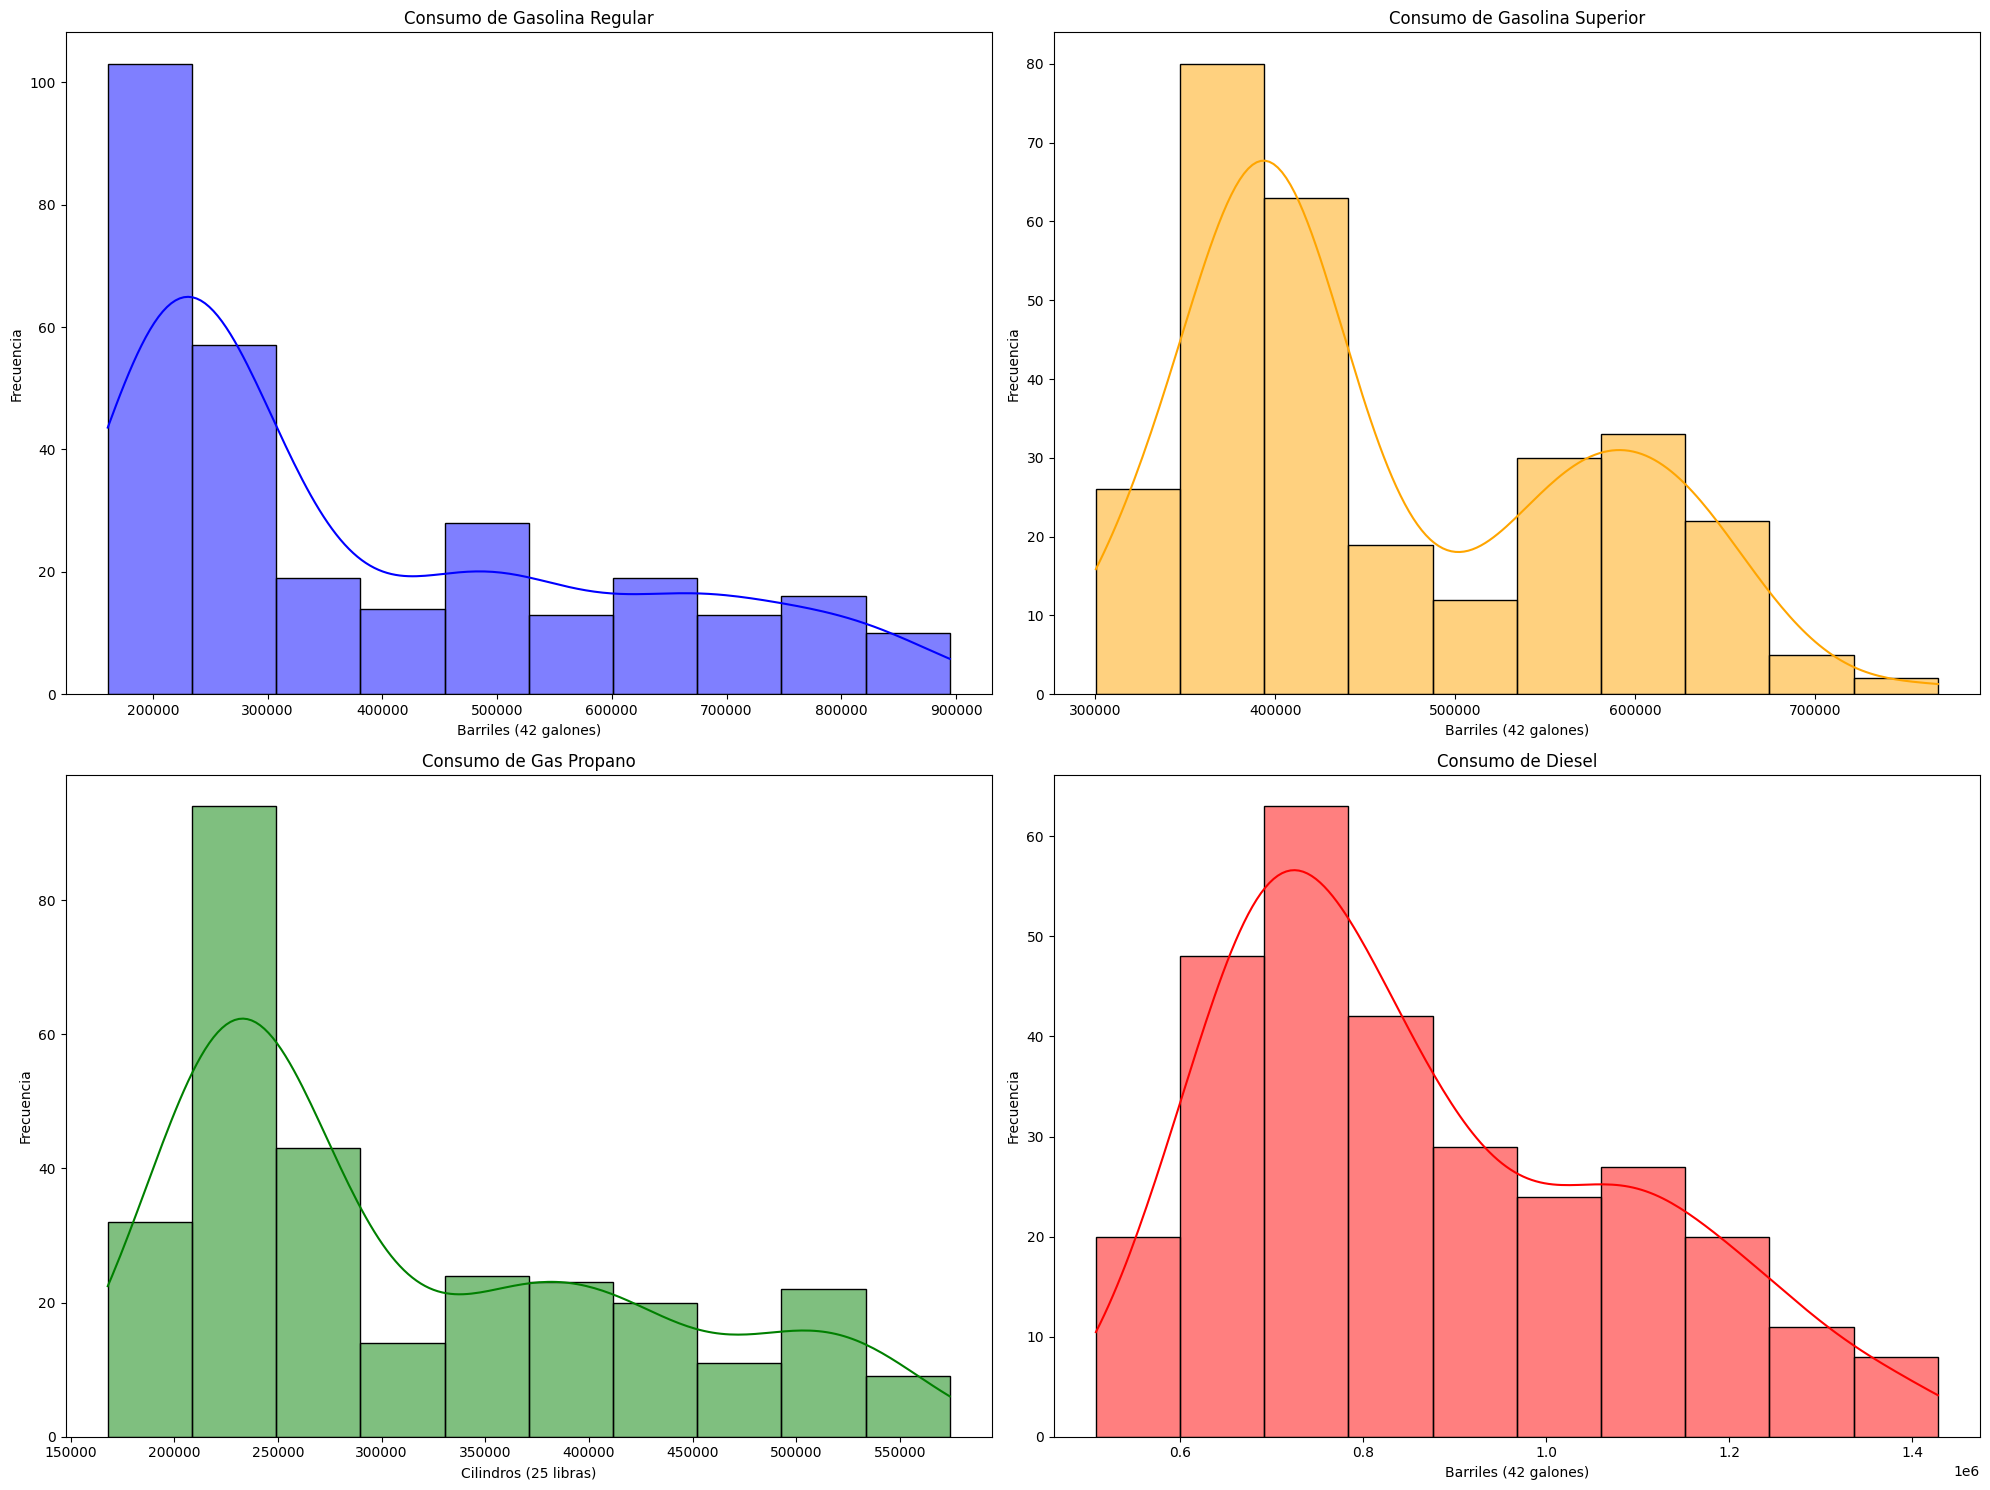

In [17]:
# Configuración de subplots para Consumo de Combustibles
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
sns.histplot(consumos['Gasolina Regular'], kde=True, ax=axs[0,0], color='blue')
axs[0,0].set_title('Consumo de Gasolina Regular')
axs[0,0].set_xlabel('Barriles (42 galones)')
axs[0,0].set_ylabel('Frecuencia')

sns.histplot(consumos['Gasolina Superior'], kde=True, ax=axs[0,1], color='orange')
axs[0,1].set_title('Consumo de Gasolina Superior')
axs[0,1].set_xlabel('Barriles (42 galones)')
axs[0,1].set_ylabel('Frecuencia')

sns.histplot(consumos['Gas Propano'], kde=True, ax=axs[1,0], color='green')
axs[1,0].set_title('Consumo de Gas Propano')
axs[1,0].set_xlabel('Cilindros (25 libras)')
axs[1,0].set_ylabel('Frecuencia')

sns.histplot(consumos['Diesel'], kde=True, ax=axs[1,1], color='red')
axs[1,1].set_title('Consumo de Diesel')
axs[1,1].set_xlabel('Barriles (42 galones)')
axs[1,1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


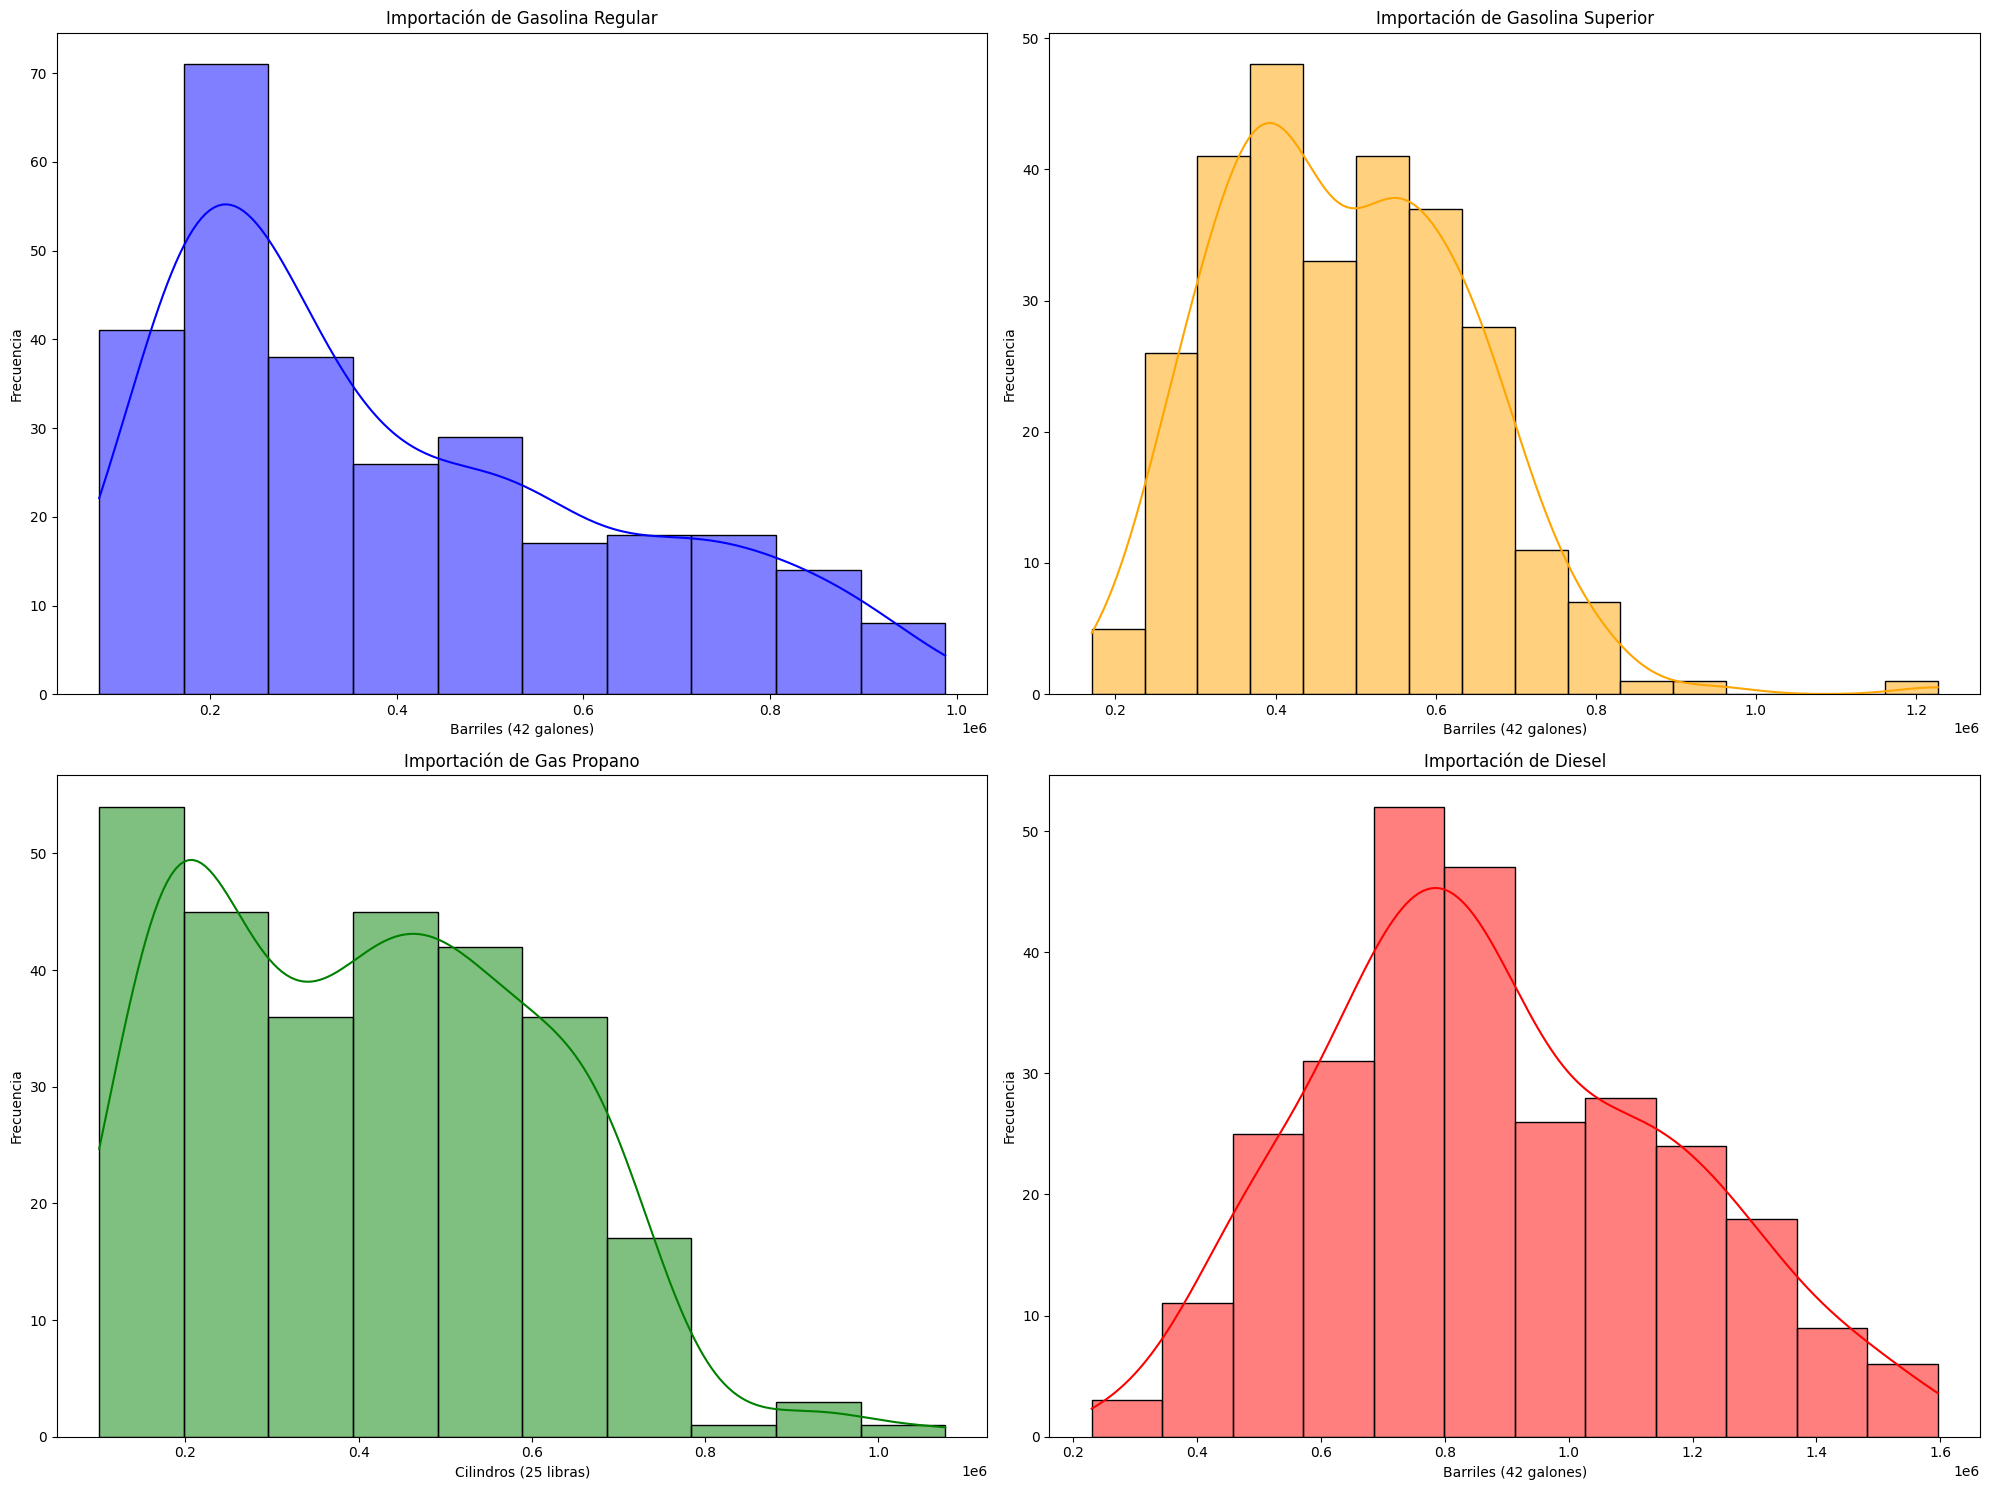

In [18]:
# Configuración de subplots para Importación de Combustibles
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
sns.histplot(importaciones['Gasolina Regular'], kde=True, ax=axs[0,0], color='blue')
axs[0,0].set_title('Importación de Gasolina Regular')
axs[0,0].set_xlabel('Barriles (42 galones)')
axs[0,0].set_ylabel('Frecuencia')

sns.histplot(importaciones['Gasolina Superior'], kde=True, ax=axs[0,1], color='orange')
axs[0,1].set_title('Importación de Gasolina Superior')
axs[0,1].set_xlabel('Barriles (42 galones)')
axs[0,1].set_ylabel('Frecuencia')

sns.histplot(importaciones['Gas Propano'], kde=True, ax=axs[1,0], color='green')
axs[1,0].set_title('Importación de Gas Propano')
axs[1,0].set_xlabel('Cilindros (25 libras)')
axs[1,0].set_ylabel('Frecuencia')

sns.histplot(importaciones['Diesel'], kde=True, ax=axs[1,1], color='red')
axs[1,1].set_title('Importación de Diesel')
axs[1,1].set_xlabel('Barriles (42 galones)')
axs[1,1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

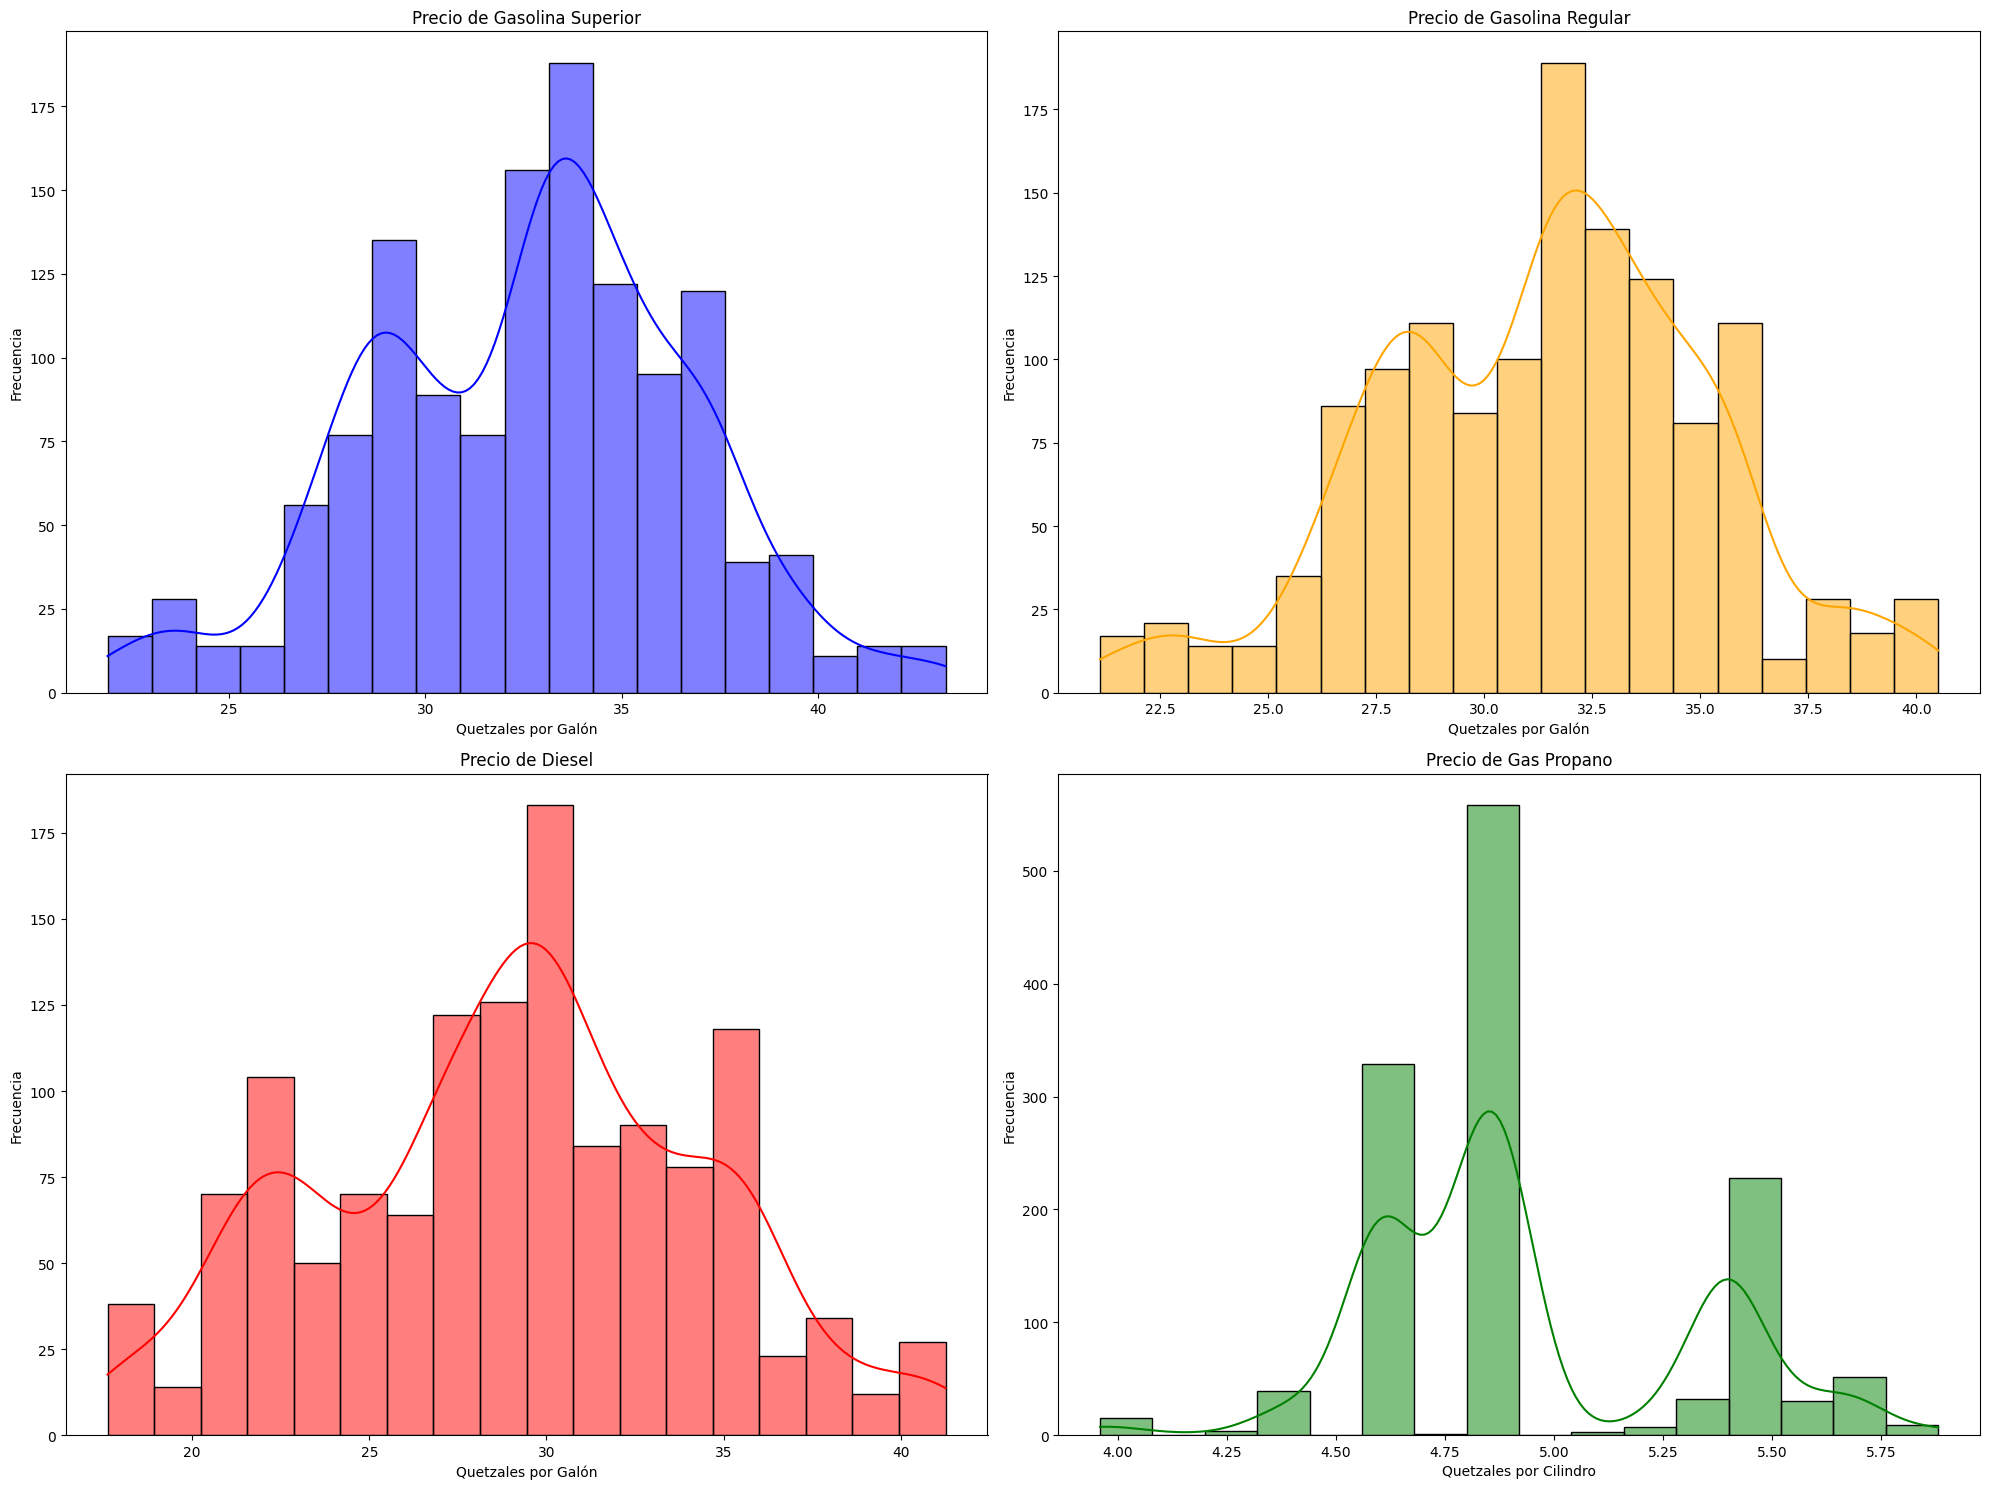

In [19]:
# Configuración de subplots para Precios de Combustibles
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
sns.histplot(precios['Gasolina Superior'], kde=True, ax=axs[0,0], color='blue')
axs[0,0].set_title('Precio de Gasolina Superior')
axs[0,0].set_xlabel('Quetzales por Galón')
axs[0,0].set_ylabel('Frecuencia')

sns.histplot(precios['Gasolina Regular'], kde=True, ax=axs[0,1], color='orange')
axs[0,1].set_title('Precio de Gasolina Regular')
axs[0,1].set_xlabel('Quetzales por Galón')
axs[0,1].set_ylabel('Frecuencia')

sns.histplot(precios['Diesel'], kde=True, ax=axs[1,0], color='red')
axs[1,0].set_title('Precio de Diesel')
axs[1,0].set_xlabel('Quetzales por Galón')
axs[1,0].set_ylabel('Frecuencia')

sns.histplot(precios['Gas Propano'], kde=True, ax=axs[1,1], color='green')
axs[1,1].set_title('Precio de Gas Propano')
axs[1,1].set_xlabel('Quetzales por Cilindro')
axs[1,1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

#### Valores Atípicos

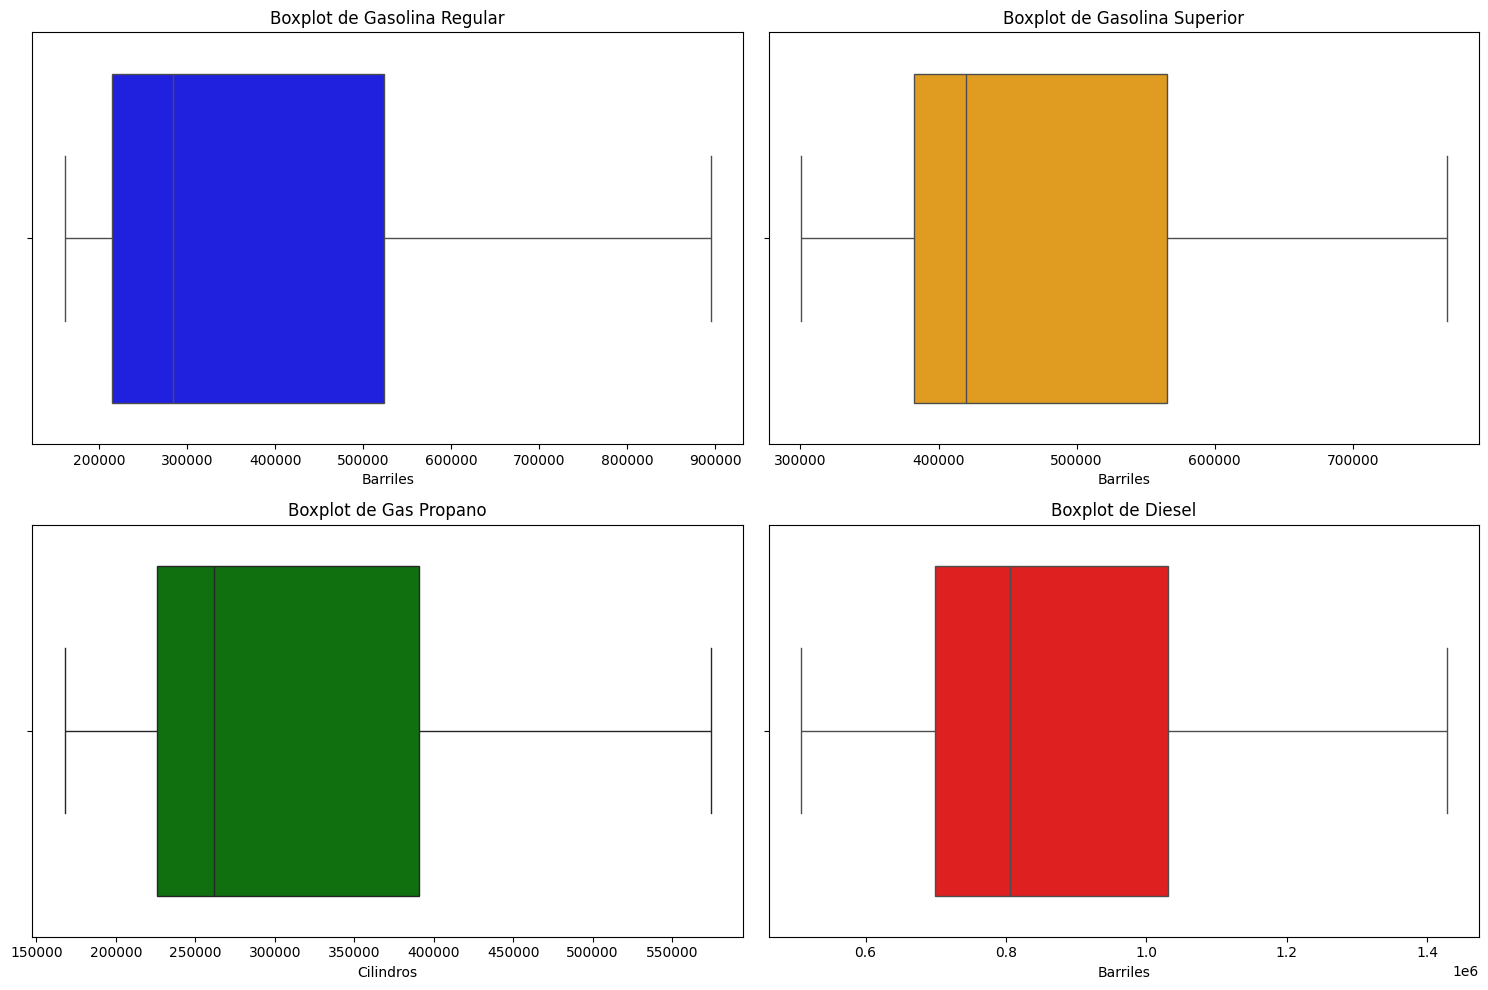

In [20]:
# Configuración de subplots para Consumo de Combustibles
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Configuración para Gasolina Regular
sns.boxplot(x=consumos['Gasolina Regular'], ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Boxplot de Gasolina Regular')
axs[0, 0].set_xlabel('Barriles')

# Configuración para Gasolina Superior
sns.boxplot(x=consumos['Gasolina Superior'], ax=axs[0, 1], color='orange')
axs[0, 1].set_title('Boxplot de Gasolina Superior')
axs[0, 1].set_xlabel('Barriles')

# Configuración para Gas Propano
sns.boxplot(x=consumos['Gas Propano'], ax=axs[1, 0], color='green')
axs[1, 0].set_title('Boxplot de Gas Propano')
axs[1, 0].set_xlabel('Cilindros')

# Configuración para Diesel
sns.boxplot(x=consumos['Diesel'], ax=axs[1, 1], color='red')
axs[1, 1].set_title('Boxplot de Diesel')
axs[1, 1].set_xlabel('Barriles')

# Ajustar el layout
plt.tight_layout()
plt.show()

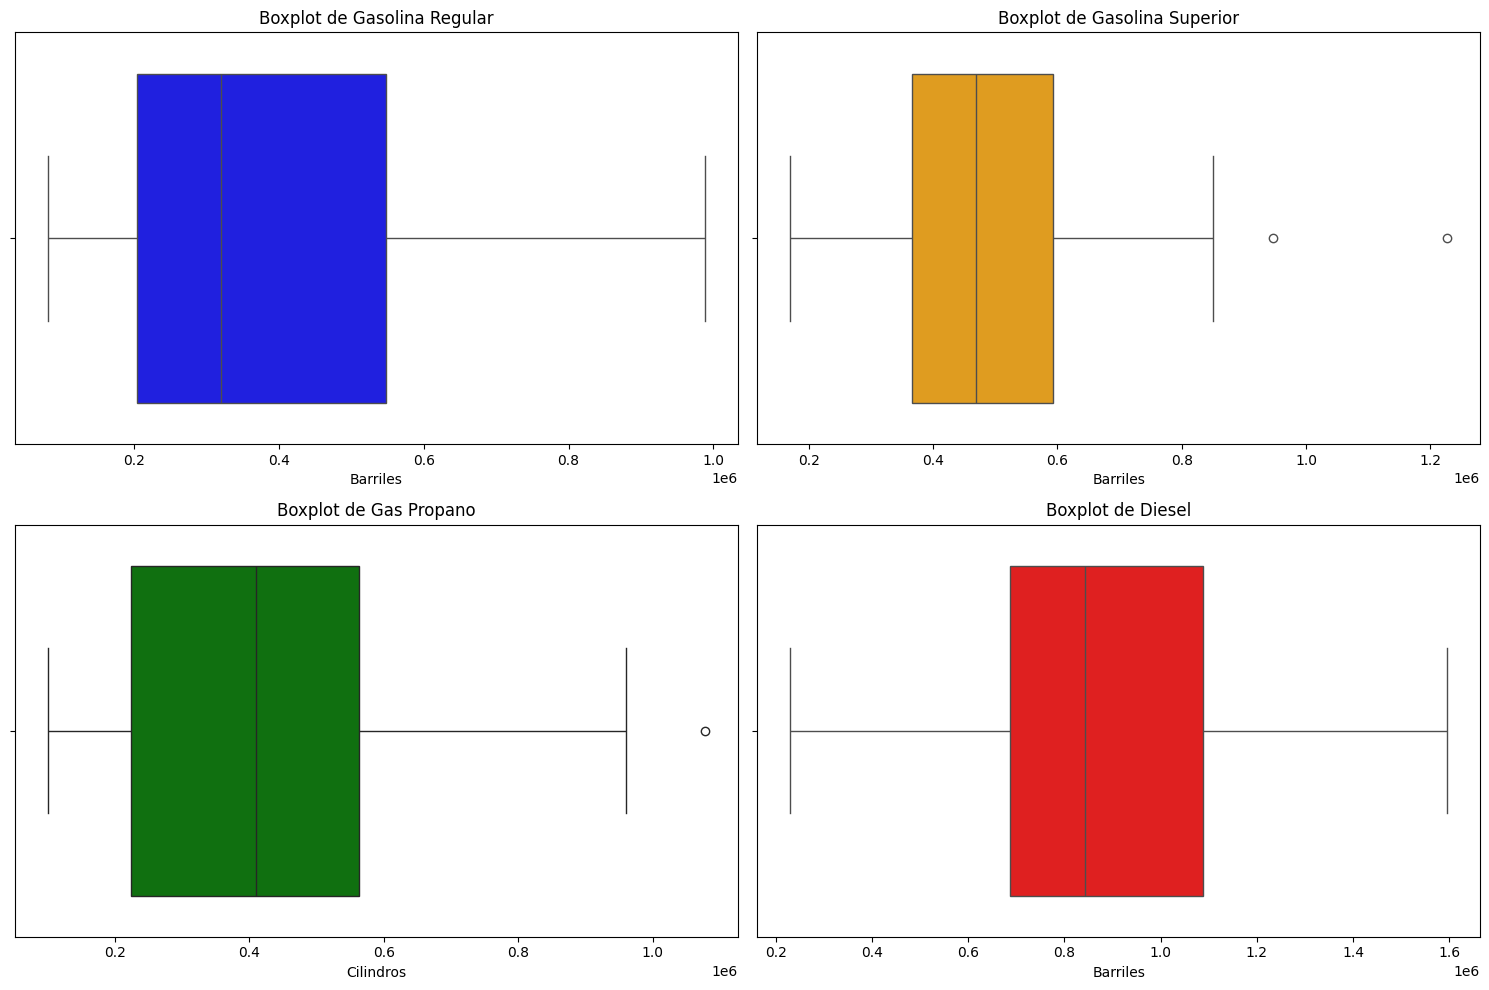

In [21]:
# Configuración de subplots para Importaciones de Combustibles
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Configuración para Gasolina Regular
sns.boxplot(x=importaciones['Gasolina Regular'], ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Boxplot de Gasolina Regular')
axs[0, 0].set_xlabel('Barriles')

# Configuración para Gasolina Superior
sns.boxplot(x=importaciones['Gasolina Superior'], ax=axs[0, 1], color='orange')
axs[0, 1].set_title('Boxplot de Gasolina Superior')
axs[0, 1].set_xlabel('Barriles')

# Configuración para Gas Propano
sns.boxplot(x=importaciones['Gas Propano'], ax=axs[1, 0], color='green')
axs[1, 0].set_title('Boxplot de Gas Propano')
axs[1, 0].set_xlabel('Cilindros')

# Configuración para Diesel
sns.boxplot(x=importaciones['Diesel'], ax=axs[1, 1], color='red')
axs[1, 1].set_title('Boxplot de Diesel')
axs[1, 1].set_xlabel('Barriles')

# Ajustar el layout
plt.tight_layout()
plt.show()

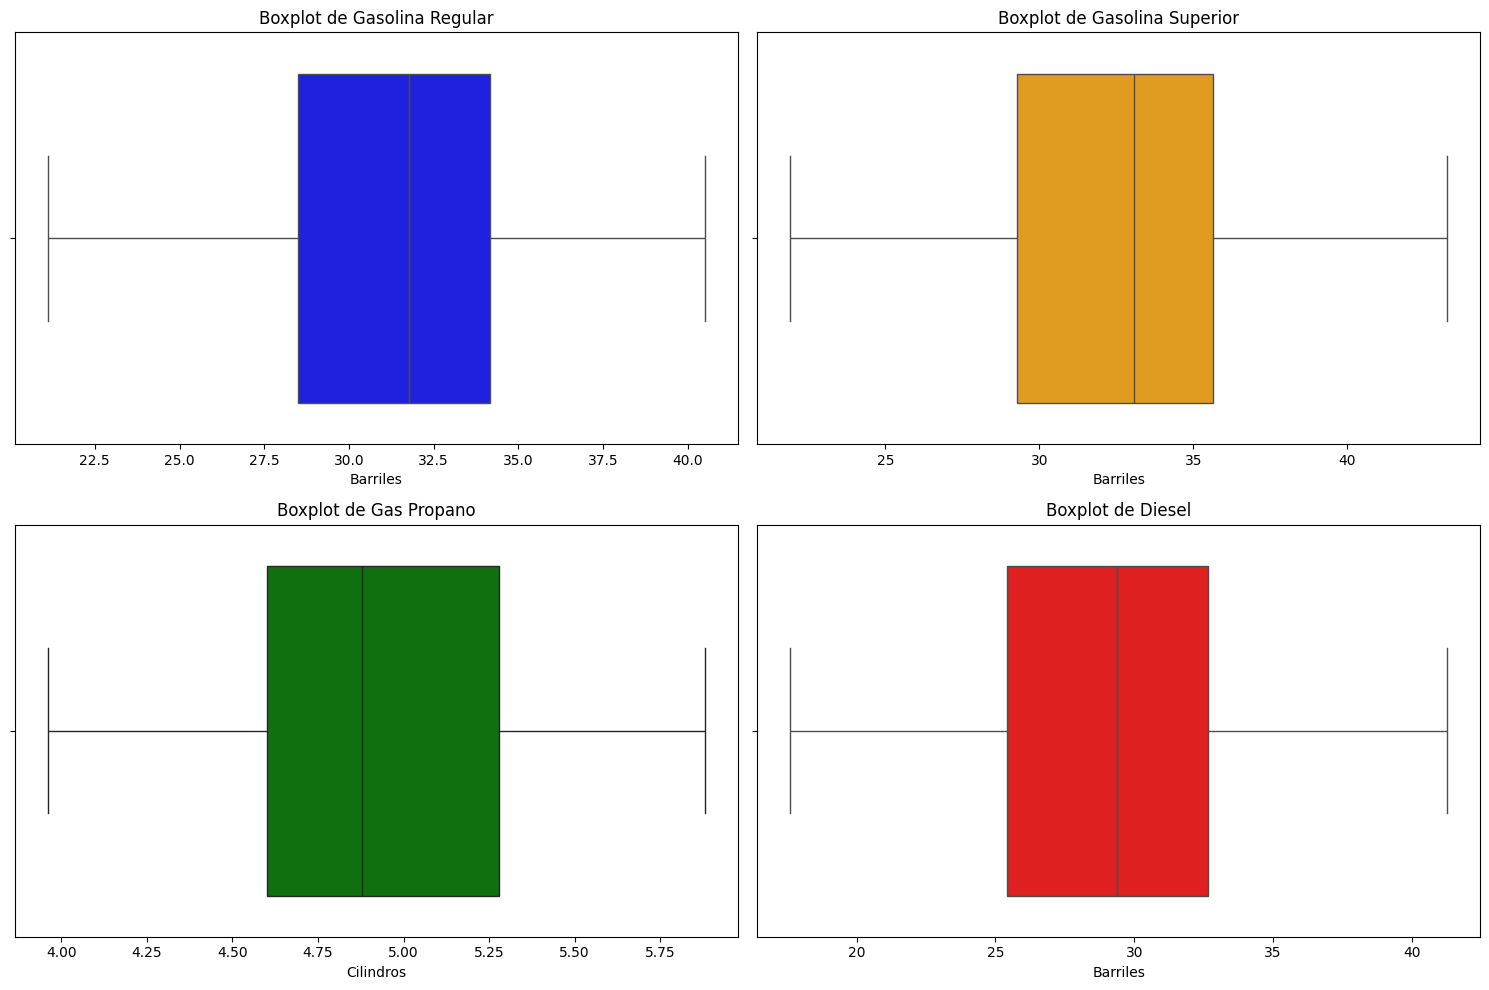

In [22]:
# Configuración de subplots para Precios de Combustibles
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Configuración para Gasolina Regular
sns.boxplot(x=precios['Gasolina Regular'], ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Boxplot de Gasolina Regular')
axs[0, 0].set_xlabel('Barriles')

# Configuración para Gasolina Superior
sns.boxplot(x=precios['Gasolina Superior'], ax=axs[0, 1], color='orange')
axs[0, 1].set_title('Boxplot de Gasolina Superior')
axs[0, 1].set_xlabel('Barriles')

# Configuración para Gas Propano
sns.boxplot(x=precios['Gas Propano'], ax=axs[1, 0], color='green')
axs[1, 0].set_title('Boxplot de Gas Propano')
axs[1, 0].set_xlabel('Cilindros')

# Configuración para Diesel
sns.boxplot(x=precios['Diesel'], ax=axs[1, 1], color='red')
axs[1, 1].set_title('Boxplot de Diesel')
axs[1, 1].set_xlabel('Barriles')

# Ajustar el layout
plt.tight_layout()
plt.show()

#### Correlación de variables

#### Tendencias a lo largo del tiempo

**Tendencia General**

**Tendencia en los ultimos años**

**Tendencia en Pandemia**

#### Datos de Interés

**Valores maximos**

**Valores Mínimos**

**Fechas de mayor movimiento**